<a href="https://colab.research.google.com/github/ritik105/Zomato_Analysis/blob/main/Zomato_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Zomato Data Analysis
#### Zomato is an Indian multinational restaurant aggregator and food delivery company founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants as well as food delivery options from partner restaurants in select cities.
#### This data contain all India Zomato store data which includes 
   * Names of Store
   - Address of Store
   - Locality 
   - City
   - Rating of store
   - Review

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data Cleaning**

### Import Liberaries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")
## warnings is import to remove unnecessery warnings like futurewarnings

In [ ]:
df =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/zomato_restaurants_in_India.csv") # import zomato csv file for visualization

In [ ]:
df.head() 
#head() is used to show top 5 rows from the dataset . If you want to see n number of rows then use head(n) instead of head().

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [ ]:
df.tail()
#tail() is used to show top last 5 rows from the dataset . If you want to see n number of rows from last then use tail(n) instead of tail().

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1
211943,18879846,Freshco's - The Health Cafe,['Café'],https://www.zomato.com/vadodara/freshcos-the-h...,"Shop 7, Ground Floor, Opposite Natubhai Circle...",Vadodara,32,Vadiwadi,22.309935,73.158768,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.0,Very Good,93,53,0.0,1,-1


In [ ]:
list(df.columns)
# here list is used to display coloumns name 

['res_id',
 'name',
 'establishment',
 'url',
 'address',
 'city',
 'city_id',
 'locality',
 'latitude',
 'longitude',
 'zipcode',
 'country_id',
 'locality_verbose',
 'cuisines',
 'timings',
 'average_cost_for_two',
 'price_range',
 'currency',
 'highlights',
 'aggregate_rating',
 'rating_text',
 'votes',
 'photo_count',
 'opentable_support',
 'delivery',
 'takeaway']

In [ ]:
df.shape

(211944, 26)

In this dataset there are **211944 rows** and **26 columns**

In [ ]:
df.isnull().sum() # to see null values in the data 


res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

 **Conclusion** : here **address** consists **134** null values ,**zipcode** consists **163187** null values, **cuisines** consists **1391** null values, **timings** consists **3874** null values and **opentable_support** consists **48** null values

In [ ]:
df["highlights"].head() # to see values of highlights column

0    ['Lunch', 'Takeaway Available', 'Credit Card',...
1    ['Delivery', 'No Alcohol Available', 'Dinner',...
2    ['No Alcohol Available', 'Dinner', 'Takeaway A...
3    ['Takeaway Available', 'Credit Card', 'Lunch',...
4    ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...
Name: highlights, dtype: object

In [ ]:
df.describe() #describe is used to see statistical data 

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [ ]:
df = df.drop(['url','city_id','zipcode','currency','country_id',"opentable_support"] , axis = 1)

 **Conclusion**: Here we dropped **'url'**, **'city_id'**, **'zipcode'**, **'currency'**, **'country_id'**, **'opentable_support'** column because this column are not useful in the below analysis and they consume unnecessary space.




In [ ]:
df.head() #this head is used to show that above mentioned columns are deleted

,res_id,name,establishment,address,city,locality,latitude,longitude,locality_verbose,cuisines,timings,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,Khandari,27.211450,78.002381,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,Agra Cantt,27.160569,78.011583,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,Shahganj,27.182938,77.979684,"Shahganj, Agra","Fast Food, Mithai",9:30 AM to 11 PM,300,1,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,Civil Lines,27.205668,78.004799,"Civil Lines, Agra","Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),300,1,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,Tajganj,27.157709,78.052421,"Tajganj, Agra","North Indian, Continental, Italian",11:30 AM to 11:30 PM,1000,3,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,1,-1


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   address               211810 non-null  object 
 4   city                  211944 non-null  object 
 5   locality              211944 non-null  object 
 6   latitude              211944 non-null  float64
 7   longitude             211944 non-null  float64
 8   locality_verbose      211944 non-null  object 
 9   cuisines              210553 non-null  object 
 10  timings               208070 non-null  object 
 11  average_cost_for_two  211944 non-null  int64  
 12  price_range           211944 non-null  int64  
 13  highlights            211944 non-null  object 
 14  aggregate_rating      211944 non-null  float64
 15  

This dataset consists 4 columns of float64 dataType , 7 columns of int64 dataType, 10 columns of object dataType

In [ ]:
df['timings'].mode()

0    11 AM to 11 PM
dtype: object

**Conclusion**: Most of the restaurants are open from **11 AM to 11 PM** 

In [ ]:
df.isnull().sum() #use to see null values in the data

res_id                     0
name                       0
establishment              0
address                  134
city                       0
locality                   0
latitude                   0
longitude                  0
locality_verbose           0
cuisines                1391
timings                 3874
average_cost_for_two       0
price_range                0
highlights                 0
aggregate_rating           0
rating_text                0
votes                      0
photo_count                0
delivery                   0
takeaway                   0
dtype: int64

In [ ]:
df["cuisines"]=df["cuisines"].fillna("No cuisine")

In [ ]:
df["address"]=df["address"].fillna("Address not given")

In [ ]:
df["timings"]=df["timings"].fillna(df["timings"].mode)

**Conclusion**: The dateTypes of **address**, **cusines**, **timings** is object and these columns contain nullValues , Therefore we can fill these columns by **"No cuisine", "Address not given", "timings"** respectively.

In [ ]:
df.isnull().sum()

res_id                  0
name                    0
establishment           0
address                 0
city                    0
locality                0
latitude                0
longitude               0
locality_verbose        0
cuisines                0
timings                 0
average_cost_for_two    0
price_range             0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
delivery                0
takeaway                0
dtype: int64

## Univariate Analysis




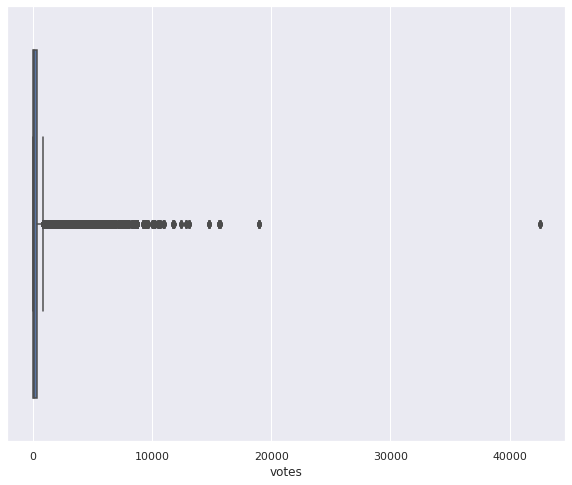

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(df["votes"])
plt.show()
# boxplot is used to visualize OUTLIERS 

In [ ]:
outliers=[]
def detect_outlier(data):
    
    threshold=3
    mean1 = np.mean(data)
    std1 =np.std(data)
    
    
    for y in data:
        z_score= (y - mean1)/std1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers             
  ## Z-test to find outliers in the data 

In [ ]:
outlier_datapoints = detect_outlier(df.votes)
print(outlier_datapoints)
print("No. of outliers in votes =", len(outlier_datapoints))


[3610, 3610, 3610, 3610, 3610, 3610, 3610, 3610, 3610, 3610, 3610, 3610, 3610, 3610, 3610, 3701, 3701, 3701, 3701, 3701, 3701, 3701, 3701, 3701, 3701, 3701, 3701, 3701, 3320, 3320, 3320, 3320, 3320, 3320, 3320, 3320, 3320, 3320, 3320, 3320, 3320, 3632, 7262, 10652, 18967, 7917, 8673, 15582, 5053, 10511, 15705, 8102, 3931, 3689, 4089, 4886, 7320, 3626, 5650, 11776, 3575, 3575, 7518, 8746, 8768, 13095, 4940, 4075, 3375, 7468, 4773, 5150, 3542, 5694, 3850, 5348, 3510, 5192, 3688, 4143, 3513, 3499, 3991, 8523, 3629, 5586, 5054, 6264, 5547, 3263, 8102, 4356, 3632, 18967, 7917, 5053, 10511, 7219, 4356, 10652, 8102, 8768, 13095, 5694, 5216, 4333, 7262, 3828, 11776, 4773, 3510, 3688, 4659, 3858, 7866, 6795, 4648, 5040, 15582, 15705, 5650, 7468, 3542, 5192, 4143, 6264, 4196, 3498, 5658, 6604, 3848, 7262, 15582, 5053, 10511, 3689, 4089, 4886, 7320, 3626, 11776, 3575, 7518, 8746, 8768, 13095, 4940, 4075, 3375, 4773, 3542, 3850, 5348, 3510, 5192, 3513, 3499, 3991, 3629, 4102, 4455, 4840, 4509, 521

**Conclusion:** there are **3773** outliers in votes column

In [ ]:
df["price_range"].unique()


array([2, 1, 3, 4])

In [ ]:
outlets=df["name"].value_counts()
outlets
# there are 41100 no. restaurants

Domino's Pizza           3108
KFC                      1343
Cafe Coffee Day          1068
Pizza Hut                 936
Subway                    766
                         ... 
Night Rocket                1
Daughter's Cook House       1
Punjabi Flavours            1
Majlis  E Mughal            1
Geeta lodge                 1
Name: name, Length: 41100, dtype: int64

In [ ]:
MoreThanTwoOutlets=outlets[outlets>=2]
DoubleOutlets=outlets[outlets==2]
SingleOutlets=outlets[outlets==1]

In [ ]:
MoreThanTwoOutlets

Domino's Pizza                      3108
KFC                                 1343
Cafe Coffee Day                     1068
Pizza Hut                            936
Subway                               766
                                    ... 
Apna Cafe                              2
Quality Cool Cafe And Cold Drink       2
Shake Valley                           2
Cake Room                              2
Honey Confectionery                    2
Name: name, Length: 24506, dtype: int64

In [ ]:
SingleOutlets

Omm Sairam Restaurant        1
Mitha & Pitha                1
Trimurti Rajputana Lodge     1
Kuro - Renaissance Hotel     1
Atmaram's Sweets & Snacks    1
                            ..
Night Rocket                 1
Daughter's Cook House        1
Punjabi Flavours             1
Majlis  E Mughal             1
Geeta lodge                  1
Name: name, Length: 16594, dtype: int64

**Conclusion:** There are **41100** restaurants in which **16594** have **single outlets**, **8121** have **double outlets**, and **24506** have **more than 2 outlets**

In [ ]:
print((df['name'].value_counts()==1).value_counts())
print((df['name'].value_counts()==2).value_counts())
print((df['name'].value_counts()>=2).value_counts())



False    24506
True     16594
Name: name, dtype: int64
False    32979
True      8121
Name: name, dtype: int64
True     24506
False    16594
Name: name, dtype: int64


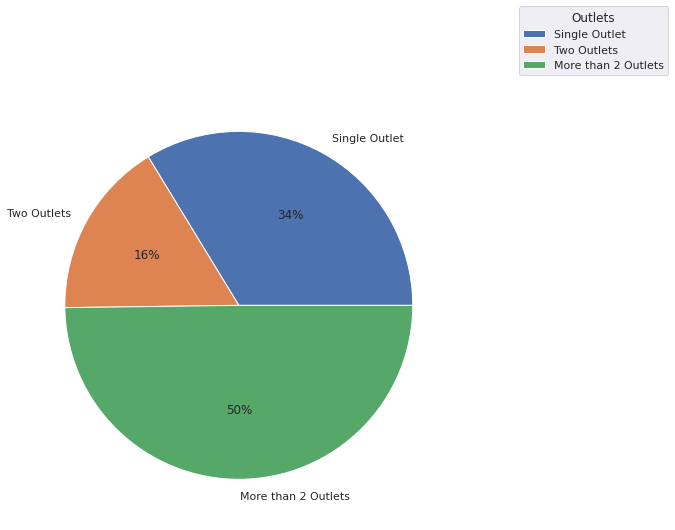

<Figure size 720x576 with 0 Axes>

In [ ]:
x= np.array([16594, 8121, 24506])
y= ['Single Outlet','Two Outlets', 'More than 2 Outlets']
plt.pie(x, labels = y,autopct='%1.0f%%')
plt.legend(title ="Outlets",loc ="best",bbox_to_anchor =(1, 0.2, 0.5, 1))
plt.show() 
plt.tight_layout()

**Conclusion:** 50% of the restaurants have more than two outlets, 34% restaurants have single outlets and rest 16% restaurants have double outlets

Text(0, 0.5, 'Number of Restaurants on Zomato')

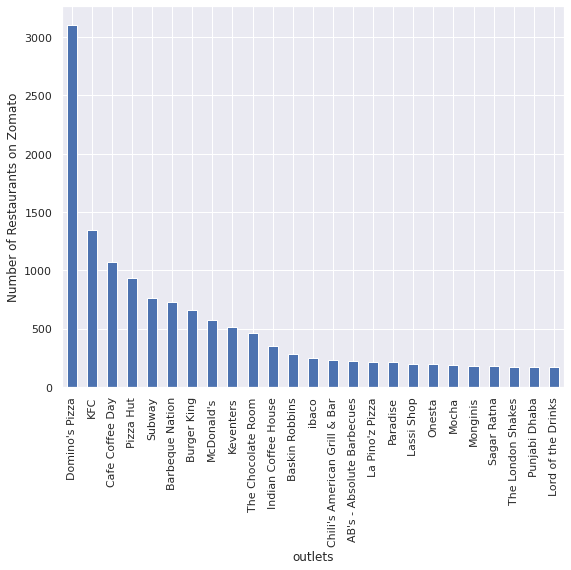

In [ ]:
outlet= (df['name'].value_counts()).head(25)
outlet.plot(kind='bar', figsize=(9, 7))
plt.xlabel("outlets")
plt.ylabel("Number of Restaurants on Zomato")

**Conclusion:** Domino's Pizza have highest numbers of outlets 

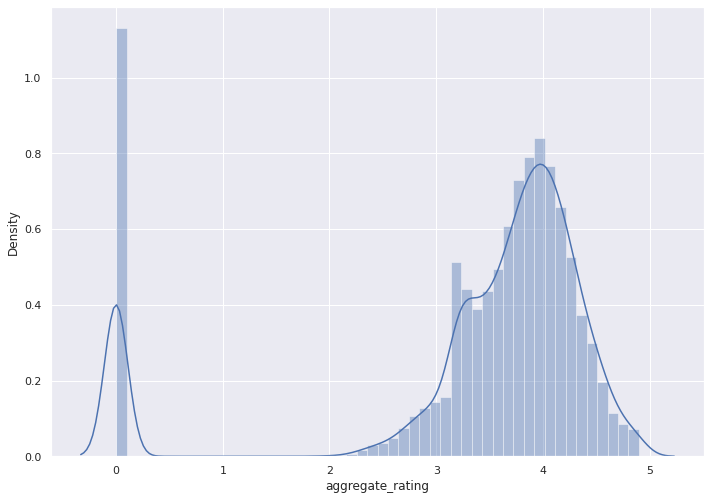

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['aggregate_rating'])
plt.show()


**Conclusion:** Most of the people don't give rating to the restaurants.But Average rating of zomato restaurants is 4.




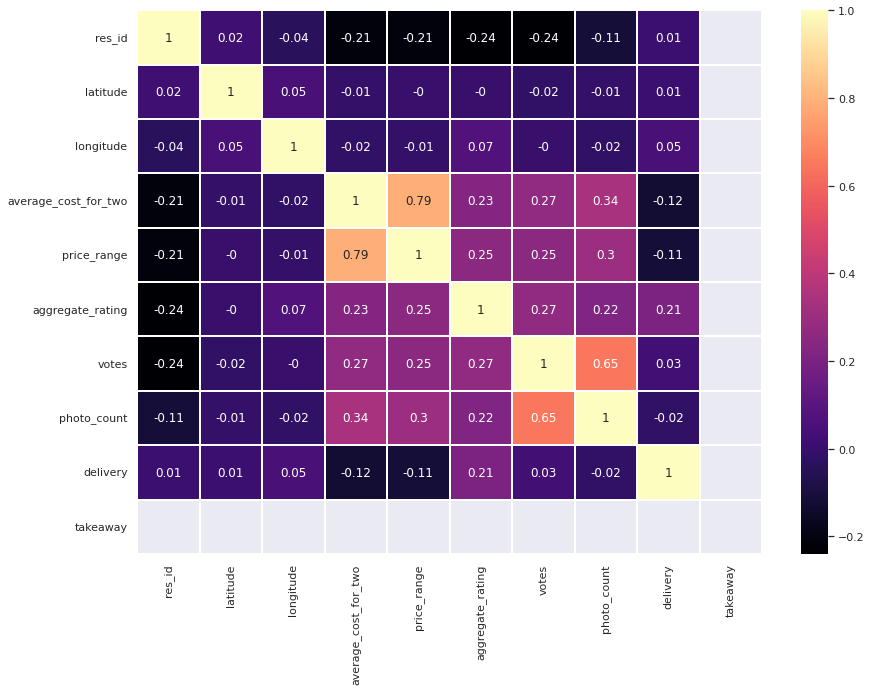

In [ ]:
plt.figure(figsize=(14,10))
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix,cmap="magma", annot=True,linewidths=1)

**Conclusion:** Price_range and Average_count_for_two have highest correlation  

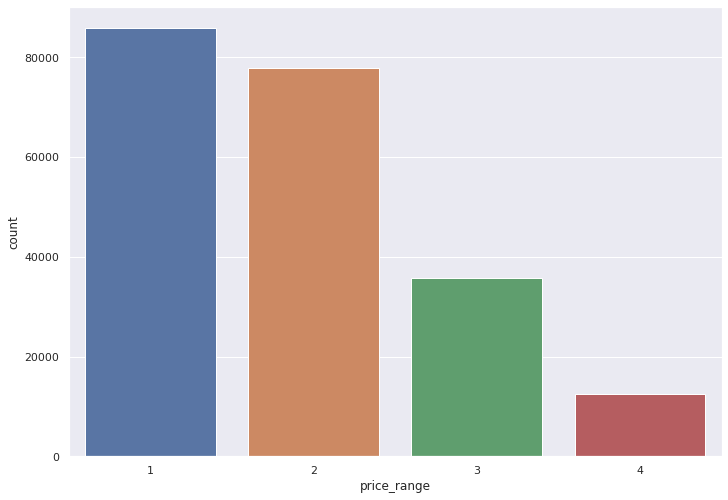

In [ ]:
sns.countplot(df['price_range'])
plt.show()

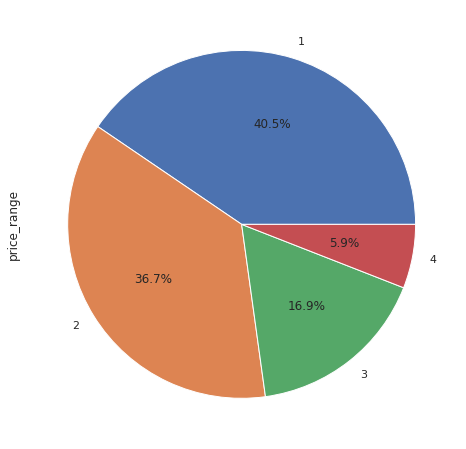

In [ ]:
df.price_range.value_counts(normalize=True).plot(kind='pie', figsize=(10,8), autopct='%1.1f%%')

**Conclusion:** Price range 1 have highest percentage of 40% which means most of the people like to order price range of 1 food

In [ ]:
df.aggregate_rating.value_counts()

0.0    23478
4.0    17477
3.9    16429
4.1    15928
3.8    15130
4.2    13651
3.7    12639
4.3    10908
3.2    10636
3.6    10247
3.3     9173
3.5     9067
3.4     8063
4.4     7760
4.5     6195
4.6     4061
3.1     3242
3.0     3001
2.9     2622
4.7     2364
2.8     2189
4.8     1744
2.7     1560
4.9     1501
2.6      995
2.5      706
2.4      601
2.3      356
2.2      133
2.1       48
2.0       22
1.9       14
1.8        4
Name: aggregate_rating, dtype: int64

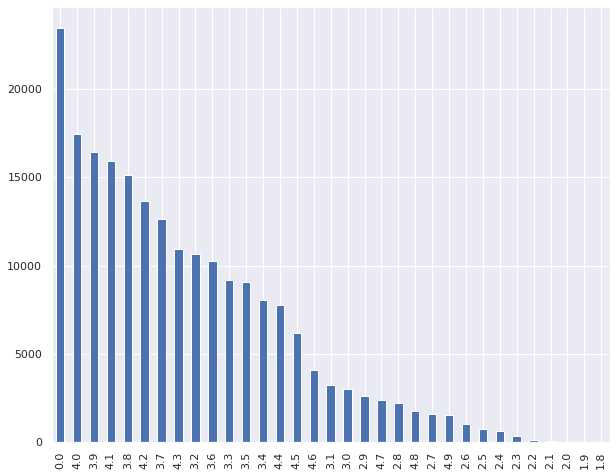

In [ ]:
df.aggregate_rating.value_counts().plot(kind='bar', figsize=(10,8))

**Conclusion:** Most of the people close the app without giving rating but most of the restaurants average rating of 4.0 

*   List item

*   List item
*   List item


*   List item



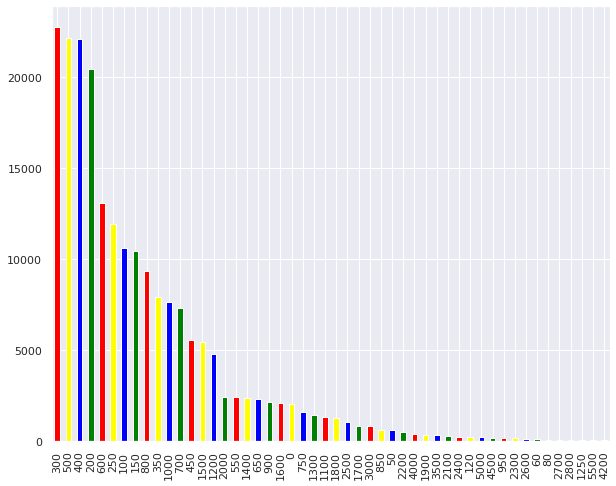

In [ ]:
df.average_cost_for_two.value_counts().head(50).plot(kind='bar',color=["Red","Yellow","Blue","Green"], figsize=(10,8))

**Conclusion:** The Highest Average_cost_for_two is 300.





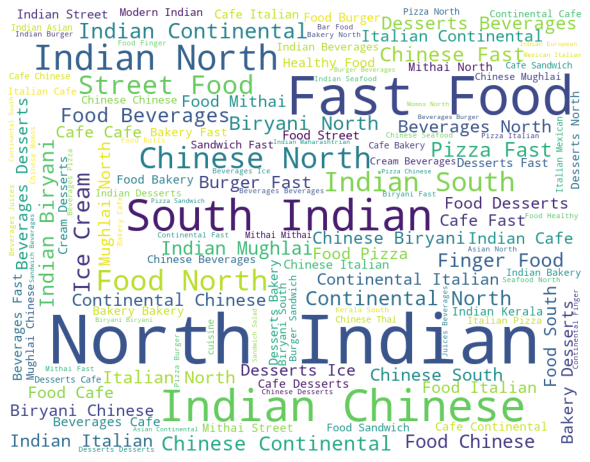

In [ ]:
from wordcloud import WordCloud, STOPWORDS
c = ""
for i in df.cuisines:
    c += str(i) + " "
wordcloud = WordCloud(width = 900, height = 700, 
                background_color ='white', 
                min_font_size = 10, max_words=130).generate(c) 
                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

**Conclusion:** The **North Indian** cuisines is the famouse cuisines among all the cuisions.

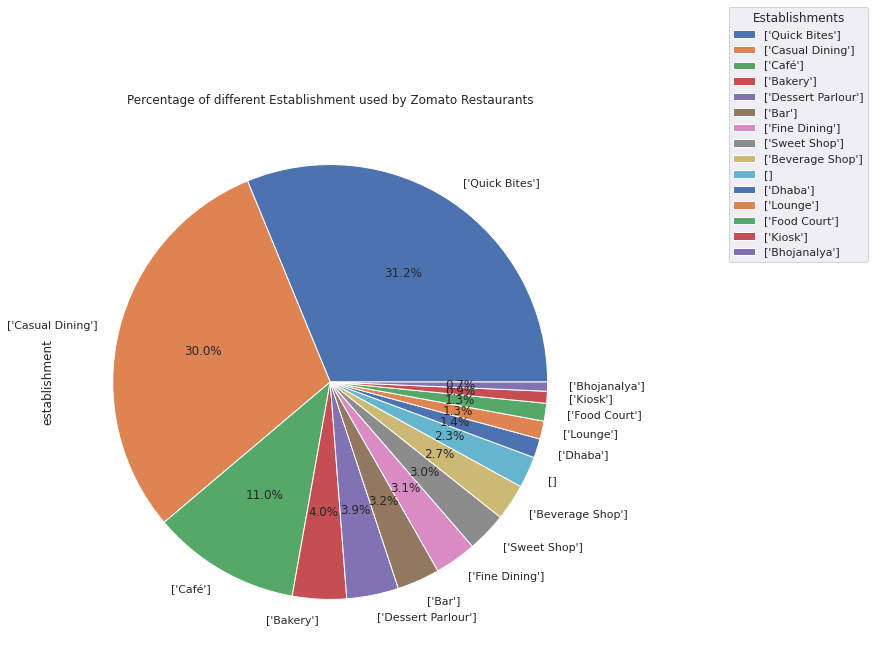

In [ ]:
df["establishment"].value_counts().head(15).plot(kind='pie',autopct='%1.1f%%',radius=1, figsize=(30,10) )
plt.legend(title ="Establishments",loc ="best",bbox_to_anchor =(1, 0.2, 0.5, 1))
plt.title("Percentage of different Establishment used by Zomato Restaurants")
plt.show()

**Conclusion:** Quick Bites has the heighest number of establishments of 31.2% .

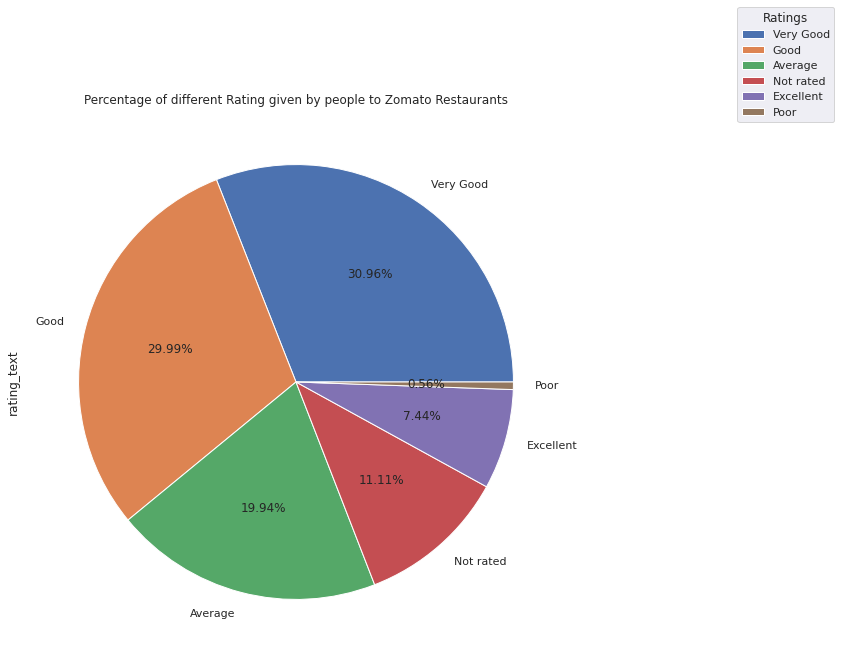

In [ ]:
df["rating_text"].value_counts().head(6).plot(kind="pie",autopct="%1.2f%%",figsize=(30,10))
plt.legend(title ="Ratings",loc ="best",bbox_to_anchor =(1, 0.2, 0.5, 1))
plt.title("Percentage of different Rating given by people to Zomato Restaurants")
plt.show()

**Conclusion:** Most of the restaurants have 'very good' rating of 30.96%.

## Bivariate Analysis

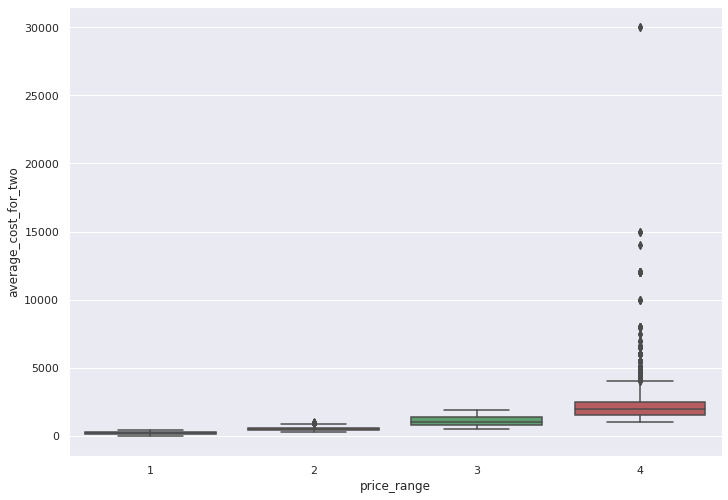

In [ ]:
sns.boxplot(data=df,x="price_range",y="average_cost_for_two")
plt.show()

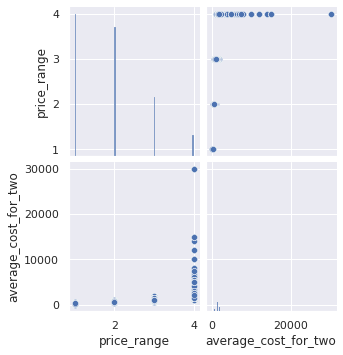

In [ ]:
sns.pairplot(data=df,vars=["price_range","average_cost_for_two"])
plt.show()

**Conclusion:** Most of the people order expensive food in a group of two and less expensive foods are order by single person.

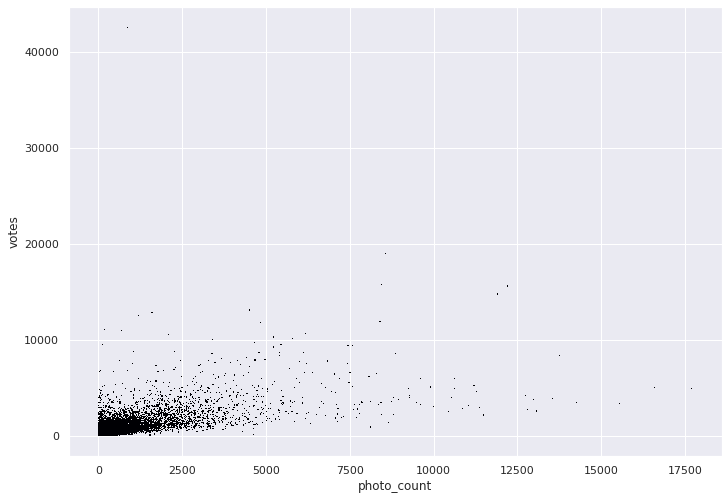

In [ ]:
sns.histplot(data=df,x="photo_count",y="votes",cmap="magma")
plt.show()

In [ ]:
df.photo_count.value_counts()

0       25793
1       11551
2        9287
3        7776
4        6287
        ...  
2405        1
1290        1
2512        1
2644        1
1614        1
Name: photo_count, Length: 2514, dtype: int64

## Multivariate Analysis

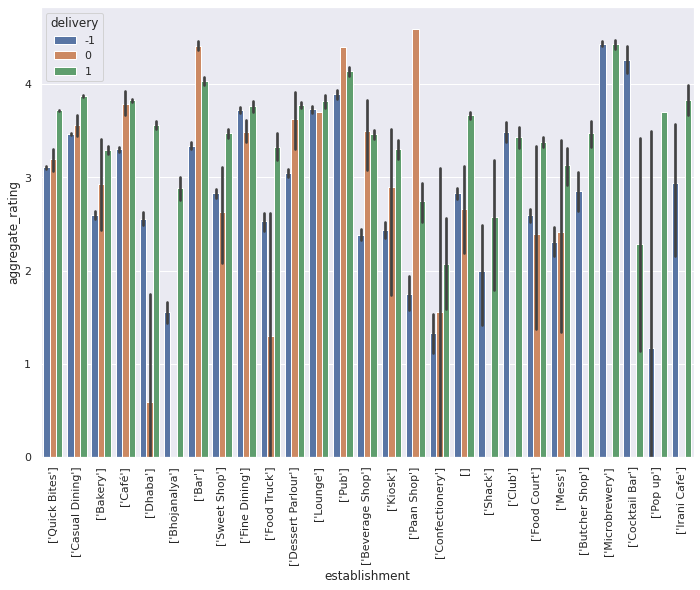

<Figure size 30000x6000 with 0 Axes>

In [ ]:
sns.barplot(x="establishment",y="aggregate_rating",data=df,hue="delivery")
plt.xticks(rotation=90)
plt.figure(figsize=(100,20),dpi=300)
plt.show()

**Conclusion:** Delivery rating of Microbrewery has the highest delivery rating.

## Stastical Analysis

In [ ]:
df.groupby("price_range")["average_cost_for_two"].mean()

price_range
1     225.265067
2     516.288496
3    1088.005116
4    2215.654482
Name: average_cost_for_two, dtype: float64

In [ ]:
df.groupby("price_range")["average_cost_for_two"].median()

price_range
1     200.0
2     500.0
3    1000.0
4    2000.0
Name: average_cost_for_two, dtype: float64